Dataset Overview:
           Species Name Migration Type  Water Temperature (°C)  \
0         Doomsday Fish       Atypical                      10   
1            Anglerfish        Typical                       5   
2  Southern Right Whale       Atypical                      15   
3   Olive Ridley Turtle       Atypical                      25   
4    Blackspot Seabream       Seasonal                      12   

   Salinity (ppt)        Sighting Location Sighting Date    IUCN Status  
0              35        Offshore Tasmania    2023-02-15     Not Listed  
1              32       Deep Sea, Atlantic    2022-08-20     Not Listed  
2              33  Adventure Bay, Tasmania    2023-06-01     Endangered  
3              30      Unexpected Location    2023-09-10     Vulnerable  
4              34    Seamount, NE Atlantic    2022-04-01  Least Concern  

Missing Values:
Species Name              0
Migration Type            0
Water Temperature (°C)    0
Salinity (ppt)            0
Sighting Loc

C:\Users\MADHU\AppData\Local\Temp\ipykernel_20988\550617488.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Migration Type', data=df, palette='Set2')


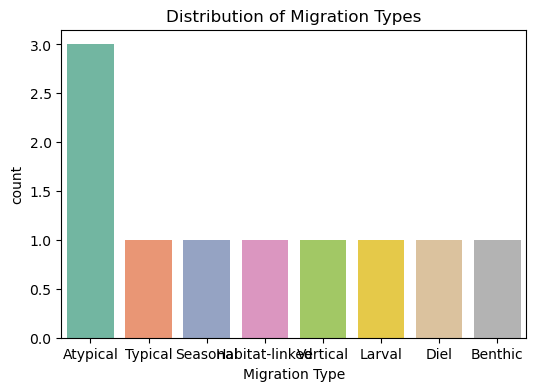


Model Evaluation:
Accuracy: 0.0

Classification Report:
                precision    recall  f1-score   support

      Atypical       0.00      0.00      0.00       0.0
          Diel       0.00      0.00      0.00       1.0
Habitat-linked       0.00      0.00      0.00       1.0
        Larval       0.00      0.00      0.00       0.0
       Typical       0.00      0.00      0.00       1.0

      accuracy                           0.00       3.0
     macro avg       0.00      0.00      0.00       3.0
  weighted avg       0.00      0.00      0.00       3.0



c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MADHU\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\MADHU\anaconda3\Lib\site-packages\sklea

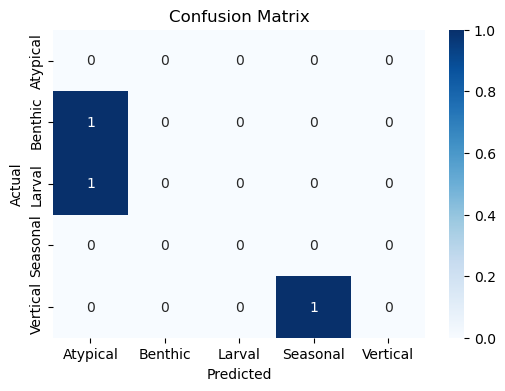


Feature Importance:
                                      Feature  Importance
0                      Water Temperature (°C)    0.187667
1                              Salinity (ppt)    0.143632
10     Sighting Location_Sunken Wood, Pacific    0.107383
9     Sighting Location_Seamount, NE Atlantic    0.103732
4         Sighting Location_Continental Shelf    0.094724
5     Sighting Location_Deep Scattering Layer    0.092124
14                     IUCN Status_Not Listed    0.079519
13                  IUCN Status_Least Concern    0.067566
8         Sighting Location_Offshore Tasmania    0.050111
15                     IUCN Status_Vulnerable    0.033094
12                     IUCN Status_Endangered    0.028622
11      Sighting Location_Unexpected Location    0.006184
3   Sighting Location_Adventure Bay, Tasmania    0.005642
2             Sighting Location_Abyssal Plain    0.000000
6        Sighting Location_Deep Sea, Atlantic    0.000000
7         Sighting Location_Hydrothermal Vent    0.

C:\Users\MADHU\AppData\Local\Temp\ipykernel_20988\550617488.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


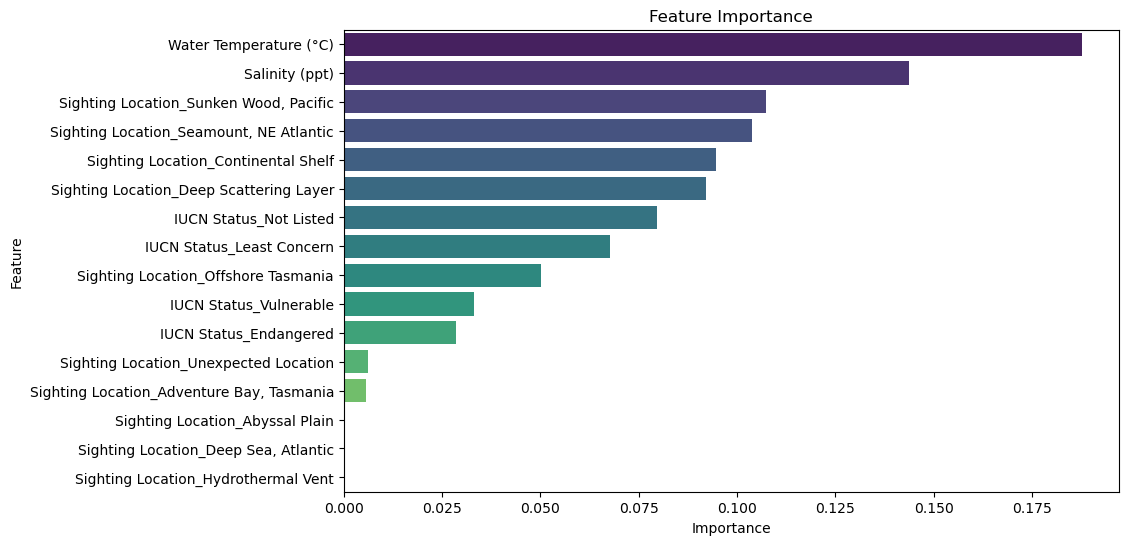

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("deepsea.csv")

# Display the first few rows of the dataset
print("Dataset Overview:")
print(df.head())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Exploratory Data Analysis (EDA)
print("\nSummary Statistics:")
print(df.describe())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Migration Type', data=df, palette='Set2')
plt.title("Distribution of Migration Types")
plt.show()

# Feature Engineering
# Convert categorical features into numerical using one-hot encoding
df = pd.get_dummies(df, columns=["Sighting Location", "IUCN Status"])

# Features and target variable
X = df.drop(columns=["Species Name", "Migration Type", "Sighting Date"])  # Features
y = df["Migration Type"]  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance
feature_importance = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(importance_df)

# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title("Feature Importance")
plt.show()